<span style="font-size: 36px;">Task 1.1</span>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.decomposition import PCA
from math import ceil  
import sys
import os

sys.path.insert(0, os.path.abspath(r'C:\Users\User\Desktop\Week-2\scripts'))

from UserOverviewanalysis import analyze_duplicated_bearer_ids, additional_aggregations

df = pd.read_csv('C:/Users/User/Desktop/10/data-2/Week2_challenge_data_source(CSV).csv')

df.head()

duplicates_sample, duration_stats, aggregated_data = analyze_duplicated_bearer_ids(df)
xdr_sessions_per_user, session_duration, data_usage, total_data_volume = additional_aggregations(df)


Sample of records with duplicated 'Bearer Id':
        Bearer Id            Start  Start ms             End  End ms  \
20  1.304243e+19   4/17/2019 0:35     363.0  4/25/2019 4:52   691.0   
30  1.304243e+19   4/18/2019 0:35     711.0  4/25/2019 4:52   691.0   
43  1.304243e+19   4/19/2019 2:55     809.0  4/25/2019 0:17   262.0   
50  1.304243e+19   4/20/2019 2:55     691.0  4/25/2019 0:17   262.0   
58  7.277826e+18  4/20/2019 14:08     136.0  4/25/2019 0:54    79.0   
62  1.304243e+19   4/21/2019 2:55      73.0  4/25/2019 0:17   262.0   
63  1.304243e+19   4/21/2019 3:04     521.0  4/25/2019 4:02   116.0   
72  7.277826e+18  4/21/2019 13:57     724.0  4/25/2019 0:54    79.0   
82  1.304243e+19   4/22/2019 0:35     293.0  4/25/2019 0:35    30.0   
84  1.304243e+19   4/22/2019 1:17     301.0  4/25/2019 1:17   938.0   

    Dur. (ms)          IMSI  MSISDN/Number          IMEI Last Location Name  \
20   706649.0  2.082010e+14   3.365875e+10  8.654080e+13            T29714B   
30   620248.

<span style="font-size: 30px;">Task 1.2 </span>

Data Types:
 duration_ms     float64
social_media    float64
google          float64
email           float64
youtube         float64
netflix         float64
gaming          float64
total_data      float64
other_data      float64
dtype: object

Total Data per Decile Class:
    decile     total_data
0       1  521036.393698
1       2  435607.171221
2       3  480871.731795
3       4  447612.453118
4       5  478819.115277
5       6  457107.180439
6       7  386858.816278
7       8  477665.331635
8       9  553236.300171
9      10  511978.874934

Basic Metrics:
        duration_ms  social_media       google        email      youtube  \
count   100.000000    100.000000   100.000000   100.000000   100.000000   
mean   5049.844895   1963.463449  1444.957332  1017.129689  2485.374610   
std    1297.215713    450.552095   407.126550   281.588799   631.210144   
min    1354.718774    581.025649   542.682222   500.830178   627.591681   
25%    4190.811619   1608.015583  1151.910845   781.527709 

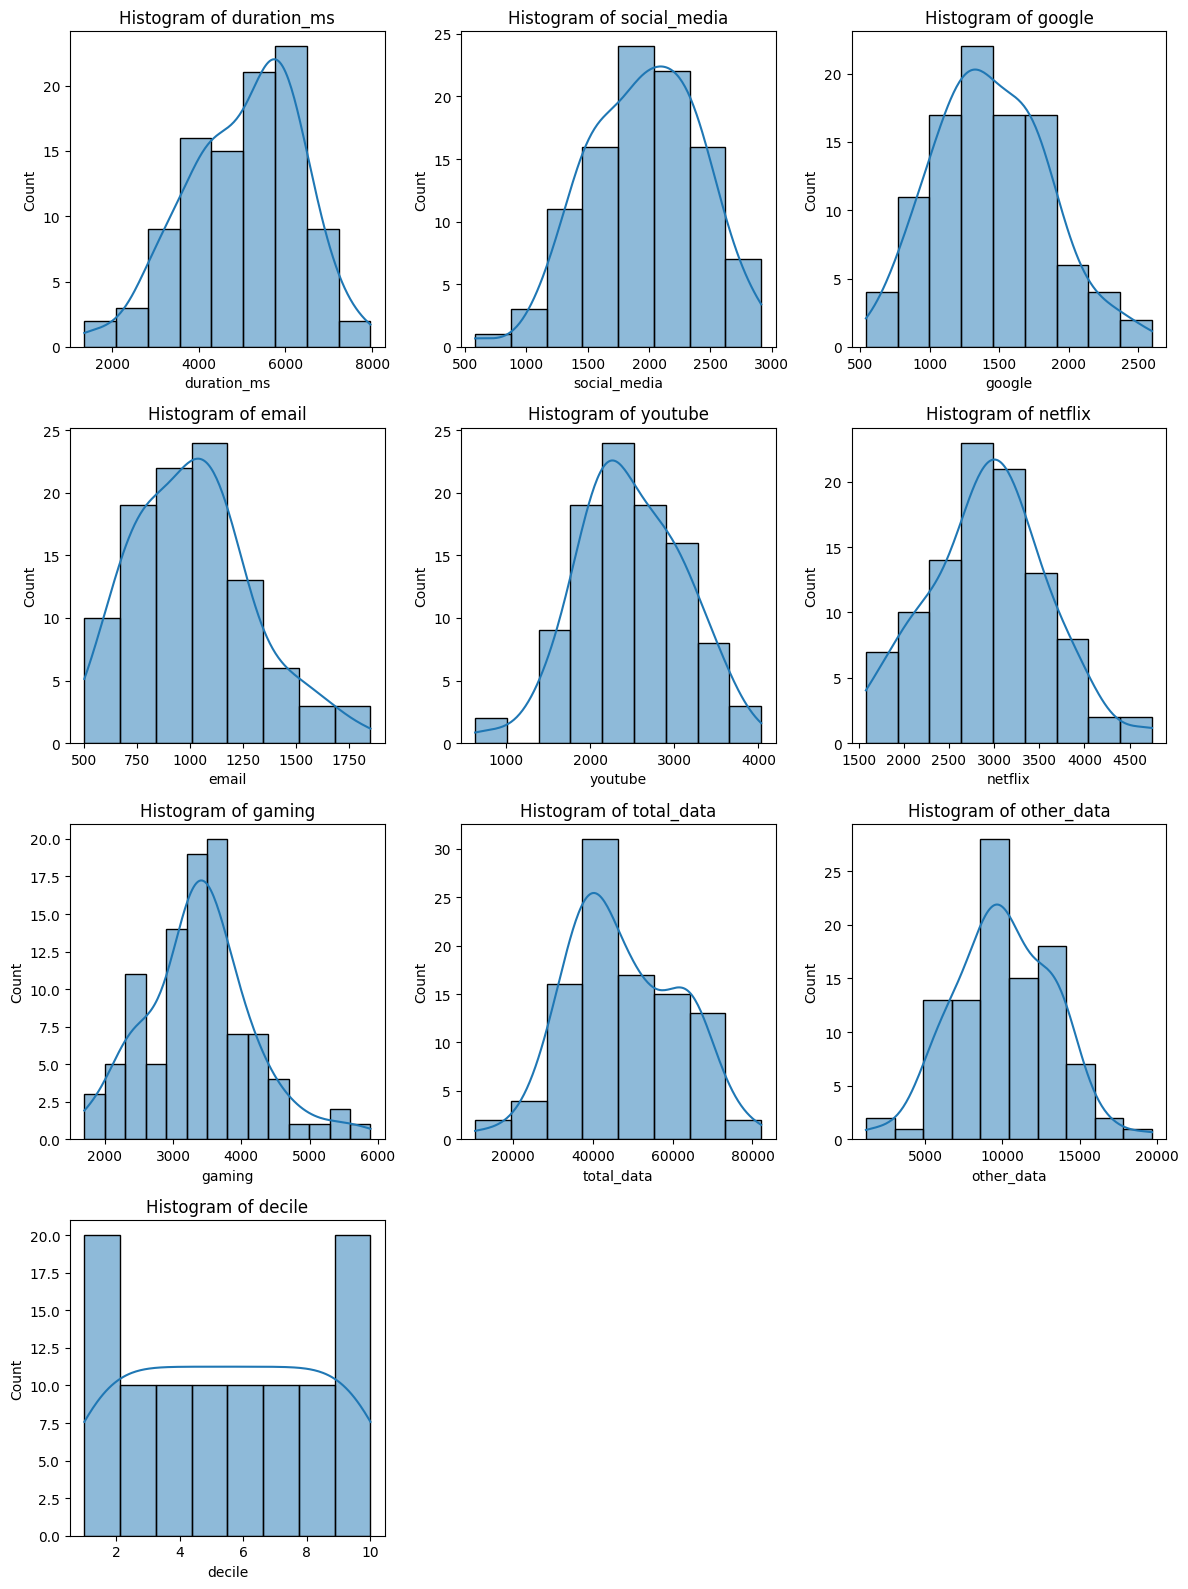

<Figure size 1200x600 with 0 Axes>

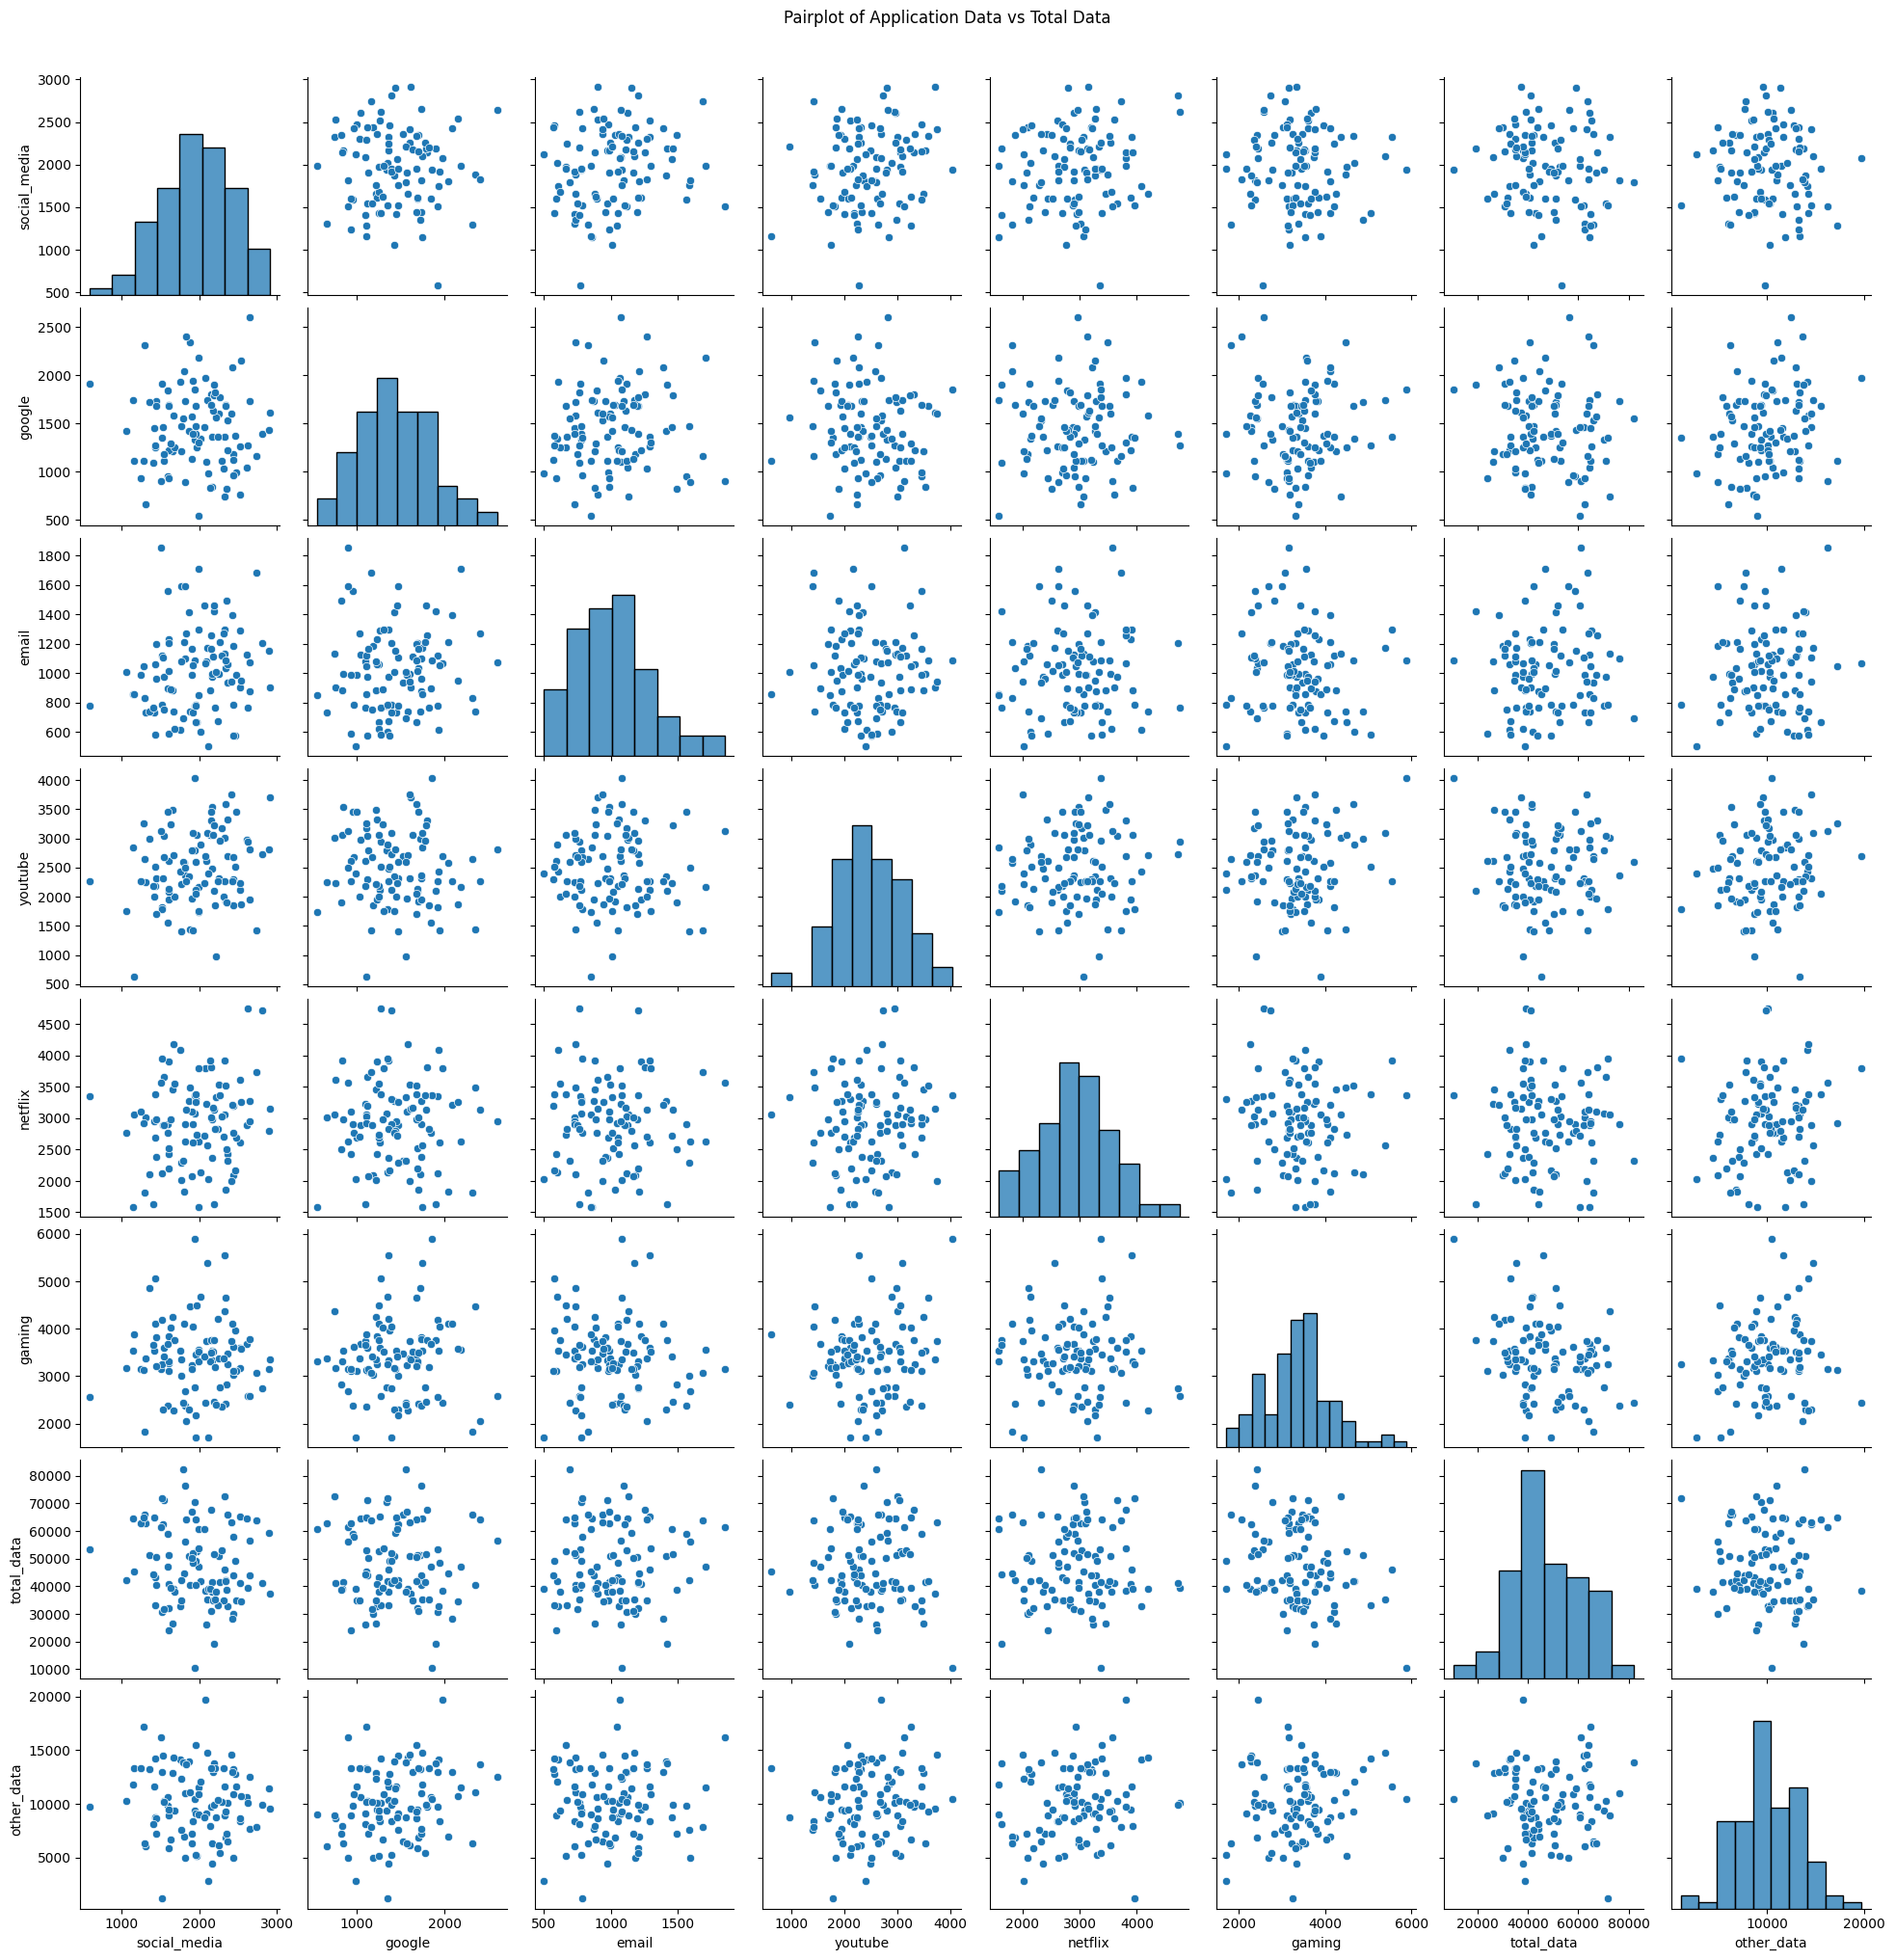


Correlation Matrix:
               social_media    google     email   youtube   netflix    gaming  \
social_media      1.000000 -0.015261  0.171378  0.185588  0.153223 -0.008576   
google           -0.015261  1.000000  0.054379 -0.093173 -0.017115  0.024590   
email             0.171378  0.054379  1.000000 -0.019714  0.018568 -0.089614   
youtube           0.185588 -0.093173 -0.019714  1.000000  0.068303  0.134068   
netflix           0.153223 -0.017115  0.018568  0.068303  1.000000 -0.029655   
gaming           -0.008576  0.024590 -0.089614  0.134068 -0.029655  1.000000   
other_data       -0.069030  0.210541  0.029050  0.139580  0.137420  0.134145   
total_data       -0.133528 -0.078983  0.059927 -0.021245 -0.015721 -0.285591   

              other_data  total_data  
social_media   -0.069030   -0.133528  
google          0.210541   -0.078983  
email           0.029050    0.059927  
youtube         0.139580   -0.021245  
netflix         0.137420   -0.015721  
gaming          0.13414

In [4]:
from UserOverviewanalysis import generate_data, analyze_data

df = generate_data()

analyze_data(df)